### cumulative distribution functions (ecdf, cdf)

- An empirical cumulative distribution function (ecdf) represents the proportion or count of observations falling below each unique value in a dataset.
- A cumulative distribution function (cdf) represents the cummulated probability density below a given value.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_theme() # Setting seaborn style

In [2]:
iris = sns.load_dataset("iris")

#### ecdf/cdf 

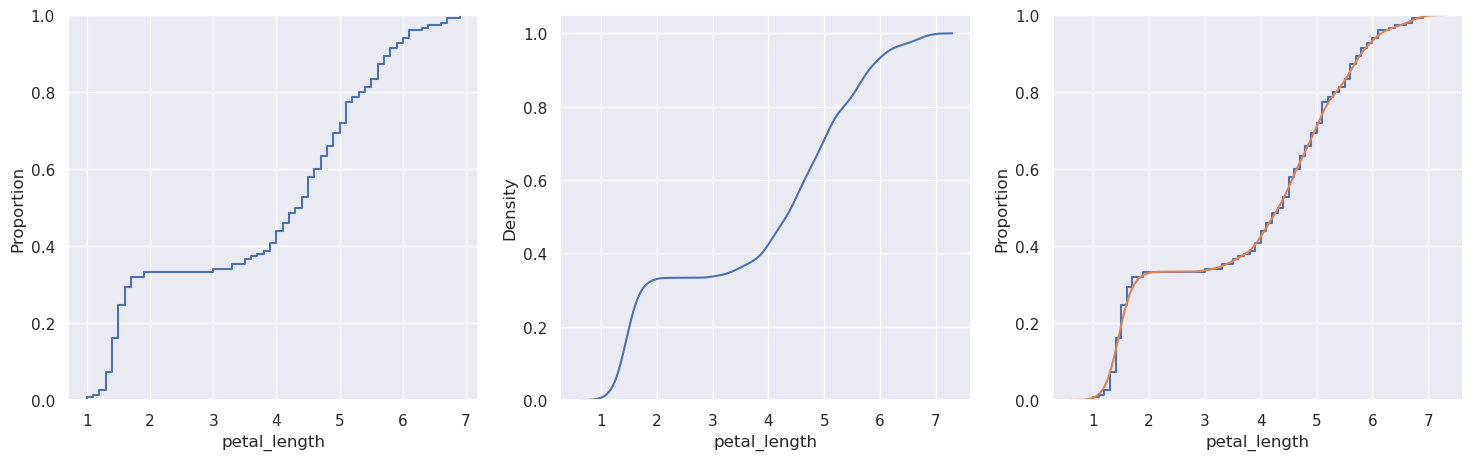

In [3]:
fig, axs = plt.subplots(1, 3, figsize=(18, 5))
# empirical cumulative distribution function
sns.ecdfplot(ax = axs[0], data = iris, x = "petal_length")
# cumulative distribution function
sns.kdeplot(ax = axs[1], data = iris, x = "petal_length", bw_adjust = 0.2, cumulative = True)
# both
sns.ecdfplot(ax = axs[2], data = iris, x = "petal_length")
sns.kdeplot(ax = axs[2], data = iris, x = "petal_length", bw_adjust = 0.2, cumulative = True);

#### cdf computation using sklearn

- same as with the pdf:
    - seaborn helps us to plot the ecdf/cdf but does not return it
    - if we need the cdf we can compute it by integrating the pdf

In [4]:
from sklearn.neighbors import KernelDensity

In [5]:
# first step is computing the pdf
data, bandwidth = iris.sepal_length, 0.2
kde = KernelDensity(kernel = 'gaussian', bandwidth = bandwidth).fit(np.array(data)[:, None])
#
bin_width = 0.5
bins = np.round(np.arange(iris['petal_length'].min() -0.4, iris['petal_length'].max() +0.4, step = bin_width), 2)
# densities
pdf = np.exp(kde.score_samples(bins[:, None]))

In [6]:
# second step is to compute the cummulative values using the np.cumsum() function
cdf = np.cumsum(pdf *bin_width)

In [7]:
import pandas as pd
pd.DataFrame(np.stack((bins, pdf, cdf)).T, columns = ['bin', 'pdf', 'cdf'])

,bin,pdf,cdf
0,0.6,6.386400e-77,3.193200e-77
1,1.1,3.423582e-58,1.711791e-58
2,1.6,3.548532e-42,1.774266e-42
3,2.1,7.139220e-29,3.569610e-29
4,2.6,2.825223e-18,1.412611e-18
5,3.1,2.295623e-10,1.147811e-10
6,3.6,4.321172e-05,2.160597e-05
7,4.1,2.562771e-02,1.283546e-02
8,4.6,2.070514e-01,1.163612e-01
9,5.1,4.116113e-01,3.221668e-01


#### define our own cdf function

In [8]:
def mycdf(data, kernel = 'gaussian', bandwidth = 0.2, bin_width = 0.2):
    kde = KernelDensity(kernel = 'gaussian', bandwidth = bandwidth).fit(np.array(data)[:, None])
    bins = np.round(np.arange(data.min() -0.4, data.max() +0.4, step = bin_width), 2)
    pdf = np.exp(kde.score_samples(bins[:, None]))
    cdf = np.cumsum(pdf *bin_width)
    return bins, pdf, cdf

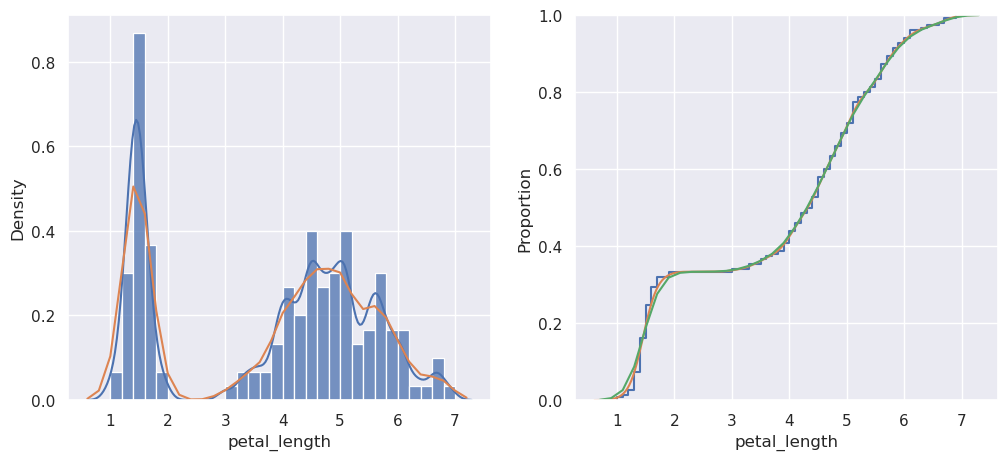

In [9]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# compute bins, pdf, cdf
kernel, bandwidth, bin_width = 'gaussian', 0.2, 0.2
bins, pdf, cdf = mycdf(iris.petal_length, kernel = kernel, bandwidth = bandwidth, bin_width = bin_width)

# seaborn density histogram
sns.histplot(ax = axs[0], data = iris, x = "petal_length", binwidth = 0.2, stat = 'density')
# seaborn pdf
sns.kdeplot(ax = axs[0], data = iris,  x = 'petal_length', bw_adjust = 0.2)
# sklearn pdf
sns.lineplot(ax = axs[0], x = bins, y = pdf)

# seaborn ecdf
sns.ecdfplot(ax = axs[1], data = iris, x = "petal_length")
# seaborn cdf
sns.kdeplot(ax = axs[1], data = iris, x = "petal_length", bw_adjust = 0.2, cumulative = True)
# sklearn cdf
sns.lineplot(ax = axs[1], x = bins +0.1, y = cdf);